# Analysing Escalability

## Import data

In [222]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

cols = ['cores', 'problem_size', 'timing']

df = pd.read_csv('times.csv', names=cols)

df.head()

,cores,problem_size,timing
0,1,16000000,2.114
1,4,16000000,0.649
2,8,16000000,0.462
3,16,16000000,0.400
4,32,16000000,0.475


## Speedups and Efficiences

In [223]:
# Tempos seriais
serial_timings = df[df['cores'] == 1]

# Speedups and efficiences vector
speedups = []
efficiencies = []

for index, row in df.iterrows():
    # Get the serial time for this problem size
    t1 = serial_timings[serial_timings['problem_size'] == row['problem_size']]['timing'].values[0]

    # Get the parallel time
    tp = row['timing']

    # Get the number of cores
    p = row['cores']
    
    # Calc speedup and efficiency
    speedups.append(t1/tp)
    efficiencies.append(t1/(p*tp))

# Add to the dataframe
df['speedup'] = speedups
df['efficiency'] = efficiencies

## Heatmaps

In [224]:
"""
Plot heatmap by means of a DataFrame
"""
def plot_heatmap(df, x, y, z):
    pivot = df.pivot(index=x,columns=y,values=z)
    sns.set()
    plt.figure(figsize=(6, 3))
    sns.heatmap(pivot, annot=True, fmt=".2f", cmap="YlGnBu")
    plt.xlabel(y)
    plt.ylabel(x)
    plt.show()

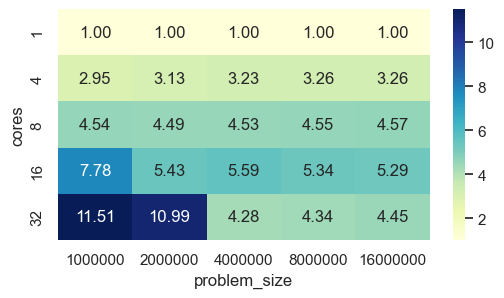

In [225]:
plot_heatmap(df, 'cores', 'problem_size', 'speedup')

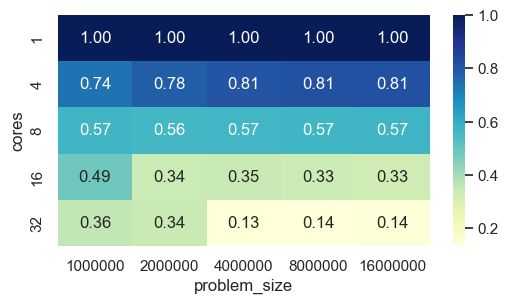

In [226]:
plot_heatmap(df, 'cores', 'problem_size', 'efficiency')